<a href="https://colab.research.google.com/github/JMML2021/0401_Registre-de-logs/blob/main/0401_Registre-de-logs%20Rev%20C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importing libraries
from urllib.request import urlretrieve
import pandas as pd
import os
import re
from datetime import datetime
import pytz
#import geocoder
import folium
import time
import urllib.request
import json
#import geopandas
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()


https://stackoverflow.com/questions/65324533/geopandas-in-google-colab

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 12.8 MB/s 
     |████████████████████████████████| 16.7 MB 18.5 MB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 


In [3]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




```
# Tiene formato de código
```

# Nivell 1
L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".


In [ ]:
# Abro archivo

df = list(open('/content/drive/MyDrive/Web_access_log-akumenius.com.txt'))
df[200:210]

['www.akumenius.com 180.76.5.31 - - [23/Feb/2014:03:15:03 +0100] "GET /destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Zurich_SUIZA-con-Alquiler-de-silla-de-ruedas HTTP/1.1" 200 8360 "-" "Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)" VLOG=-\n',
 'www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:15:03 +0100] "GET /hoteles-baratos/ofertas-hotel-Capitolio-Apartamentos-Turisticos-en-Merida-207271b-destinos.html HTTP/1.1" 404 3100 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-\n',
 'www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:15:06 +0100] "GET /destinos-baratos/destinosEstrelles/hoteles-en-Gary_ESTADOS%20UNIDOS-con-4-estrellas HTTP/1.1" 200 8812 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-\n',
 'www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:15:06 +0100] "GET /hoteles-baratos/ofertas-hotel-Guitart-Termes-La-Collada-en-La%20Molina-6833b-destinos.

# Creo un fichero de IPs chopeadas del original

In [ ]:
print('NUmero de registros:')
len(df)

NUmero de registros:


261873

# Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [ ]:
#2.- Separo la parte central.

def custom_split(str_to_split):
    separatorsCentro = "[", "]", "\s", ",",' ','+', ')', '(', '"'
    # create regular expression dynamically
    regular_exp = '|'.join(map(re.escape, separatorsCentro))

    return re.split(regular_exp, str_to_split)

In [ ]:
def separoCorchete ( textoCortar):
  separatorsCentro = "]"
  regular_exp = '|'.join(map(re.escape, separatorsCentro))

  return re.split(regular_exp, textoCortar)



In [ ]:
def arregloFecha(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`
    '''
    dt = datetime.strptime(x, '%d/%b/%Y:%H:%M:%S')

    return dt

In [ ]:
#2.- Separo la parte central.

def custom_split_Dcha(str_to_split):
    #separatorsCentro = "[", "]", "\s", ",",' ','+', ')', '(', '"'
    separatorsCentro = "[", "]", '"'



    # create regular expression dynamically
    regular_exp = '|'.join(map(re.escape, separatorsCentro))

    return re.split(regular_exp, str_to_split)

In [ ]:
df1 = df.copy()
data = {'virtual_host': [],    'IPs': [],    'Fecha': [],    'request': [],  'status': [], 'size': [], 'referer': [], 'user_agent': []}

df_salida = pd.DataFrame(data)
print('lineas total ------> ', len(df1))

for s, textoLinea  in enumerate(df1):
  #if len(textoLinea) == 23:
    #print ('---', s, textoLinea) 
  problematico= 0
  if s<5000:
    textin = separoCorchete(textoLinea)
    if len(textin) > 2:
      textin[1] = textin[1] +textin[2]


    print(s, len(textin), textin[1])
    texto = custom_split(textin[0])

    textoDcha= custom_split_Dcha(textin[1])
    #for p, q in enumerate(textoDcha):
     #print(p,q)

    
    nueva_fila = {'request': textoDcha[1],
            'status': textoDcha[2],
            'size': textoDcha[3], 
            'referer': textoDcha[5]}
            

Se han truncado las últimas 5000 líneas del flujo de salida.
2500 2  "GET /destinos-caracteristicas/hoteles-baratos-en-La-Gomera_ESPA%C3%91A-con-Cambio-de-divisas HTTP/1.1" 200 7236 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-

2501 2  "GET /destinosCaracteristicas/hoteles-baratos-en-Ho-Chi-Minh-City-(Saigon)-and-South_VIETNAM-con-WIFI HTTP/1.1" 200 7218 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-

2502 2  "GET /hoteles-baratos/ofertas-puente-de-mayo.html HTTP/1.1" 200 6125 "http://www.akumenius.com/" "Mozilla/5.0 (compatible; spbot/4.0.7; +http://OpenLinkProfiler.org/bot )" VLOG=-

2503 2  "GET /destinosCaracteristicas/hoteles-baratos-en-Sligo_IRLANDA-con-Cafeter%C3%ADa HTTP/1.1" 200 7929 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-

2504 2  "GET /hoteles-baratos/ofertas-hotel-Hunters-Hall-en-TETBURY-136214t-destinos.html HTTP/1.1" 404 3100 "-" "Mozilla/5.0 (comp


Once the lines are printed, we see they are in the lines shows Common Log Format (CLF) :

check https://httpd.apache.org/docs/2.2/logs.html what CLF means  

He dividido cada linea es 2 partes para tener mejor control y reducir el numero de accesos que hace con cada "spliter" elemento.
El lado Izq va hasta que encuentra el ']' y la derecha es el otro lado y lo separare por ".


In [ ]:
import re
 
chopear = input('Quieres abrir el fichero de nuevo y?')
if chopear == 'y' or chopper =='Y':
  texto=[]

    
  df1 = df.copy()
  data = {'virtual_host': [],    'IPs': [],    'Fecha': [],    'request': [],  'status': [], 'size': [], 'referer': [], 'user_agent': []}

  df_salida = pd.DataFrame(data)
  print('lineas total ------> ', len(df1))

  #for s, textoLinea  in enumerate(df1):
  #  print('Hola', s, textoLinea)

  for s, textoLinea  in enumerate(df1):
    #if len(textoLinea) == 23:
      #print ('---', s, textoLinea) 
    problematico= 0
    if s<10000000:
      textin = separoCorchete(textoLinea)

      #print(s, len(textin), textin[0])
      texto = custom_split(textin[0])
      if len(textin) > 2:
        textin[1] = textin[1] +textin[2]

      nueva_fila = {'virtual_host': texto[0],
            'IPs': texto[1],
            'Fecha': arregloFecha(texto[5])}  # Lo tranformo en fecha

      textoDcha= custom_split_Dcha(textin[1])
    #for p, q in enumerate(textoDcha):
     #print(p,q)

    
    nueva_fila = {'virtual_host': texto[0],
            'IPs': texto[1],
            'Fecha': arregloFecha(texto[5]),
            'request': textoDcha[1],
            'status': textoDcha[2],
            'size': textoDcha[3], 
            'referer': textoDcha[5]}

      #for p,q in enumerate(texto):
        #print(p, q)

    if s%10000 ==0 :
            print(s, 'Z--->', nueva_fila)
            print()
    #df_salida=pd.DataFrame.from_dict(nueva_fila, orient='index') 
    df_salida= df_salida.append(nueva_fila, ignore_index=True) 

  # Guardo la informacion en drive   
  path = ('/content/drive/MyDrive/01_COLAB/' +'direcionesIP_otro.csv')
  df_salida.to_csv(path)
  #
  #df_salida.type
  print('Forma ', df_salida.shape)

  df_salida.head(-20)


Quieres abrir el fichero de nuevo y?y
lineas total ------>  261873
0 Z---> {'virtual_host': 'localhost', 'IPs': '127.0.0.1', 'Fecha': datetime.datetime(2014, 2, 23, 3, 10, 31), 'request': 'OPTIONS * HTTP/1.0', 'status': ' 200 - ', 'size': '-', 'referer': 'Apache (internal dummy connection)'}

10000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '144.76.95.232', 'Fecha': datetime.datetime(2014, 2, 23, 10, 24, 39), 'request': 'GET /destinos-baratos/hoteles-baratos/ofertas-hotel-NH-Palacio-de-Tepa-en-Puerta%20del%20Sol-Plaza%20Mayor-137745b-destinos.html HTTP/1.0', 'status': ' 404 3100 ', 'size': '-', 'referer': 'Mozilla/5.0 (compatible; MJ12bot/v1.4.4; http://www.majestic12.co.uk/bot.php?+)'}

20000 Z---> {'virtual_host': 'www.akumenius.com', 'IPs': '180.76.5.171', 'Fecha': datetime.datetime(2014, 2, 23, 15, 14, 11), 'request': 'GET /destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Ceuta_ESPA%C3%91A-con-Habitaciones-climatizadas HTTP/1.1', 'status': ' 200 7214 ', 'size': 

In [ ]:
print(type(df_salida))
print(df_salida.dtypes)
print('Tmaño: ', df_salida.shape)

<class 'pandas.core.frame.DataFrame'>
virtual_host            object
IPs                     object
Fecha           datetime64[ns]
request                 object
status                  object
size                    object
referer                 object
user_agent             float64
dtype: object
Tmaño:  (261873, 8)


Una vez chopeado el fichero principal. LO guardo asi no es necesario repetir este proceso que ha durado varias horas.

# Abrir fichero de IPs creado

In [7]:
path = ('/content/drive/MyDrive/01_COLAB/' +'direcionesIP.csv')
df=  pd.read_csv(path)
print('Tamaño antes de tomar una muestra: ', df.shape)

#df = df.sample(frac = 0.5)
#df = df[1294:1305]
print(type(df))
print('Tamaño: ', df.shape)

Tamaño antes de tomar una muestra:  (261873, 9)
<class 'pandas.core.frame.DataFrame'>
Tamaño:  (261873, 9)


# Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

Lo primero que voy a hacer es minimizar la base de datos.
La manera que se me ha ocurrido es poner un contador por Ip y asi si hay IP repetidas solo la buscará una vez y tendre la cantidad en el df

In [ ]:
data_ip =df["IPs"].value_counts().rename_axis('ip').reset_index(name="visits")
data_ip.head()

In [ ]:
!pip install geocoder

In [ ]:
import geocoder

ip = geocoder.ip("157.55.32.183")
print(ip.city)
print(ip)
print(ip.latlng)

# Exercici 3
Geolocalitza les IP's.

In [11]:

location = geocoder.ip('66.249.76.216')

Este proceso dura varios minutos y lo que hago es trabajar contra un fichero que he creado y asi lo hago más eficiente.

In [12]:
posicion = []

for index, value in data_ip["ip"].items():
    with urllib.request.urlopen("https://geolocation-db.com/jsonp/"+value,timeout=500) as url:
                data = url.read().decode()
                data = data.split("(")[1].strip(")")
                data = json.loads(data)
                posicion.append(data)


KeyboardInterrupt: ignored

In [13]:
posicion = pd.DataFrame(posicion)
 
type(posicion)

pandas.core.frame.DataFrame

In [14]:
!pip install geopandas
import geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 6.3 MB 43.6 MB/s 
     |████████████████████████████████| 16.7 MB 366 kB/s 


In [17]:
posicion['cantidad'] = data_ip['visits']
posicion = posicion[posicion['state']!= 'Not found']
posicion

country_code   country_name                     city postal latitude  \
0            US  United States                     None   None   37.751   
1            ES          Spain                   Madrid  28045  40.4165   
3            ES          Spain                 Bormujos  41930  37.3736   
4            US  United States                     None   None   37.751   
5            US  United States                 New York  10011  40.7308   
6            ES          Spain                 Valencia  46015  39.4698   
7            ES          Spain                 Marbella  29602  36.5154   
8            US  United States                  Chicago  60604  41.8785   
9            FR         France                     None   None  48.8582   
10           ES          Spain     Palazuelos de Eresma  40194  40.9305   
11           ES          Spain      Torres de Berrellen  50693   41.758   
12           ES          Spain                     None   None  40.4172   
13           ES          Spain                     Coin  29100  36.6595   
14           ES          Spain                  Seville  41015  37.3824   
15           ES          Spain                    Cadiz  11011  36.5298   
16           US  United States                   Dallas  75270  32.7787   
17           US  United States                   Dallas  75270  32.7787   
18         None           None                     None   None       47   
19           ES          Spain                Barcelona  08027  41.3888   
20           ES          Spain                 Herencia  13640  39.3662   
21           ES          Spain                    Narón  15570  43.5167   
22           US  United States                     None   None   37.751   
23           US  United States                     None   None   37.751   
24           ES          Spain                   Lorqui  30564  38.0826   
25           ES          Spain                  Granada  18014  37.1882   
26           US  United States                     None   None   37.751   
27           ES          Spain              Fuenlabrada  28940  40.2842   
28           ES          Spain                Barcelona  08004  41.3888   
29           DE        Germany                     None   None  51.2993   
30           ES          Spain     Castelló de la Plana  12006  40.2108   
31           ES          Spain             Canada Rosal  41439  37.5992   
32           ES          Spain  Sant Antoni de Portmany  07820  38.9807   
33           ES          Spain                   Abaran  30550  38.2055   
34           ES          Spain                    Palma  07004  39.5694   
35           NL    Netherlands                Amsterdam   1091  52.3556   
36           NL    Netherlands                Amsterdam   1091  52.3556   
37           ES          Spain           Colmenar Viejo  28770  40.6591   
38           ES          Spain                  Almansa  02640  38.8692   
39           NL    Netherlands                Amsterdam   1091  52.3556   
40           NL    Netherlands                Amsterdam   1091  52.3556   
41           NL    Netherlands                Amsterdam   1091  52.3556   
42           NL    Netherlands                Amsterdam   1091  52.3556   
43           NL    Netherlands                Amsterdam   1091  52.3556   
44           NL    Netherlands                Amsterdam   1091  52.3556   
45           NL    Netherlands                Amsterdam   1091  52.3556   
46           ES          Spain                     None   None  40.4172   
47           NL    Netherlands                Amsterdam   1091  52.3556   
48           IT          Italy                   Varese  21100     45.8   

   longitude             IPv4                state  cantidad  
0    -97.822    66.249.76.216                 None     46382  
1    -3.7026    80.28.221.123               Madrid     14725  
3    -6.0723   217.125.71.222              Seville      5201  
4    -97.822    66.249.75.148                 None      3558  
5   -73.9975

In [18]:
  # Guardo el archivo con la geoposiciones

  pathPosicion = ('/content/drive/MyDrive/01_COLAB/' +'GEOdirecionesIP.csv')

In [24]:
sobreEscribir = input('Quiere sobre escribir el fichero? y/Y')
if (sobreEscribir=='Y' or sobreEscribir=='y'):
    posicion.to_csv(path)

Quiere sobre escribir el fichero? y/Yn


Si ya hemos geolocacliadas todas las Ips, entonces solo tenemos que descar el fichero y no hace falta repetir todos los pasos anteriores

In [25]:
# Abro archivo

posicion = pd.read_csv(pathPosicion)
posicion[200:210]

Unnamed: 0 country_code   country_name             city postal  latitude  \
200         201           ES          Spain           Madrid  28028   40.4165   
201         202           US  United States              NaN    NaN   47.6062   
202         203           ES          Spain           Madrid  28034   40.4165   
203         204           ES          Spain  Vitoria-Gasteiz  01010   42.8500   
204         205           ES          Spain              NaN    NaN   40.4172   
205         206           ES          Spain              NaN    NaN   40.4172   
206         207           ES          Spain              NaN    NaN   40.4172   
207         208           ES          Spain             León  24008   42.6000   
208         209           ES          Spain        Salobreña  18680   36.7428   
209         210           ES          Spain              NaN    NaN   40.4172   

     longitude            IPv4          state  cantidad  \
200    -3.7026      95.63.2.45         Madrid       176   
201  -122.3321   157.56.92.174     Washington       176   
202    -3.7026   85.48.101.193         Madrid       175   
203    -2.6727   85.84.176.196  Araba / Álava       174   
204    -3.6840  188.76.115.200            NaN       174   
205    -3.6840     31.4.236.23            NaN       174   
206    -3.6840  62.175.136.122            NaN       173   
207    -5.5703   77.229.122.97           Leon       173   
208    -3.5872  185.16.209.176        Granada       172   
209    -3.6840   87.223.105.21            NaN       171   

                      geometry  
200    POINT (-3.7026 40.4165)  
201  POINT (-122.3321 47.6062)  
202    POINT (-3.7026 40.4165)  
203      POINT (-2.6727 42.85)  
204     POINT (-3.684 40.4172)  
205     POINT (-3.684 40.4172)  
206     POINT (-3.684 40.4172)  
207       POINT (-5.5703 42.6)  
208    POINT (-3.5872 36.7428)  
209     POINT (-3.684 40.4172)

In [26]:
posicion = pd.DataFrame(posicion)
 
type(posicion)

pandas.core.frame.DataFrame

In [27]:
posicion.head(-1)

Unnamed: 0 country_code   country_name      city postal  latitude  \
0              0           US  United States       NaN    NaN   37.7510   
1              1           ES          Spain    Madrid  28045   40.4165   
2              3           ES          Spain  Bormujos  41930   37.3736   
3              4           US  United States       NaN    NaN   37.7510   
4              5           US  United States  New York  10011   40.7308   
...          ...          ...            ...       ...    ...       ...   
2913        2915           EC        Ecuador      Loja    NaN   -4.0000   
2914        2916           ES          Spain    Gandia  46701   38.9667   
2915        2917           ES          Spain       NaN    NaN   40.4172   
2916        2918           CN          China       NaN    NaN   34.7725   
2917        2919           US  United States       NaN    NaN   37.7510   

      longitude             IPv4              state  cantidad  \
0      -97.8220    66.249.76.216                NaN     46382   
1       -3.7026    80.28.221.123             Madrid     14725   
2       -6.0723   217.125.71.222            Seville      5201   
3      -97.8220    66.249.75.148                NaN      3558   
4      -73.9975  162.243.192.191           New York      2927   
...         ...              ...                ...       ...   
2913   -79.2167       200.0.29.9  Provincia de Loja         1   
2914    -0.1833    84.123.150.27           Valencia         1   
2915    -3.6840  217.130.150.116                NaN         1   
2916   113.7266     202.46.52.23                NaN         1   
2917   -97.8220  216.151.130.170                NaN         1   

                      geometry  
0       POINT (-97.822 37.751)  
1      POINT (-3.7026 40.4165)  
2      POINT (-6.0723 37.3736)  
3       POINT (-97.822 37.751)  
4     POINT (-73.9975 40.7308)  
...                        ...  
2913       POINT (-79.2167 -4)  
2914   POINT (-0.1833 38.9667)  
2915    POINT (-3.684 40.4172)  
2916  POINT (113.7266 34.7725)  
2917    POINT (-97.822 37.751)  

[2918 rows x 11 columns]

In [28]:
# Elimino todos los registros que no tengan informacion
# por ejemplo los 'not found'

posicion['cantidad'] = data_ip['visits']
posicion = posicion[posicion['latitude']!= 'Not found']
posicion.shape

(2919, 11)

In [29]:
posicion['latitude'].astype(float, errors = 'raise')
posicion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2919 non-null   int64  
 1   country_code  2906 non-null   object 
 2   country_name  2906 non-null   object 
 3   city          1804 non-null   object 
 4   postal        1631 non-null   object 
 5   latitude      2919 non-null   float64
 6   longitude     2919 non-null   float64
 7   IPv4          2919 non-null   object 
 8   state         2200 non-null   object 
 9   cantidad      2919 non-null   int64  
 10  geometry      2919 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 273.7+ KB


In [30]:
gdf = geopandas.GeoDataFrame(
    posicion, geometry=geopandas.points_from_xy(posicion.longitude,posicion.latitude))

In [31]:
gdf.head(-1)

Unnamed: 0 country_code   country_name      city postal  latitude  \
0              0           US  United States       NaN    NaN   37.7510   
1              1           ES          Spain    Madrid  28045   40.4165   
2              3           ES          Spain  Bormujos  41930   37.3736   
3              4           US  United States       NaN    NaN   37.7510   
4              5           US  United States  New York  10011   40.7308   
...          ...          ...            ...       ...    ...       ...   
2913        2915           EC        Ecuador      Loja    NaN   -4.0000   
2914        2916           ES          Spain    Gandia  46701   38.9667   
2915        2917           ES          Spain       NaN    NaN   40.4172   
2916        2918           CN          China       NaN    NaN   34.7725   
2917        2919           US  United States       NaN    NaN   37.7510   

      longitude             IPv4              state  cantidad  \
0      -97.8220    66.249.76.216                NaN     46382   
1       -3.7026    80.28.221.123             Madrid     14725   
2       -6.0723   217.125.71.222            Seville     13892   
3      -97.8220    66.249.75.148                NaN      5201   
4      -73.9975  162.243.192.191           New York      3558   
...         ...              ...                ...       ...   
2913   -79.2167       200.0.29.9  Provincia de Loja         1   
2914    -0.1833    84.123.150.27           Valencia         1   
2915    -3.6840  217.130.150.116                NaN         1   
2916   113.7266     202.46.52.23                NaN         1   
2917   -97.8220  216.151.130.170                NaN         1   

                        geometry  
0     POINT (-97.82200 37.75100)  
1      POINT (-3.70260 40.41650)  
2      POINT (-6.07230 37.37360)  
3     POINT (-97.82200 37.75100)  
4     POINT (-73.99750 40.73080)  
...                          ...  
2913  POINT (-79.21670 -4.00000)  
2914   POINT (-0.18330 38.96670)  
2915   POINT (-3.68400 40.41720)  
2916  POINT (113.72660 34.77250)  
2917  POINT (-97.82200 37.75100)  

[2918 rows x 11 columns]

In [32]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

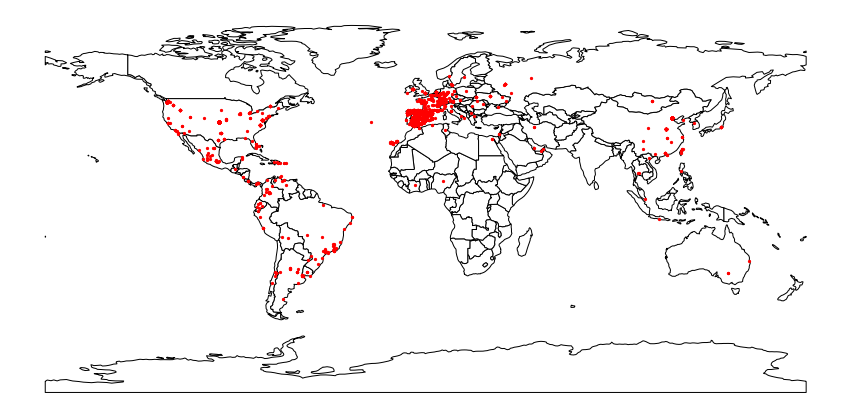

In [33]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
ax.set_axis_off()

gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

In [34]:
! pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.965, -5.664], zoom_start=3)
mc = MarkerCluster()

In [36]:
#! pip install geocoder

In [37]:
for i in range(0,len(posicion)):
    mc.add_child(folium.Marker(
        location=[posicion.iloc[i]["latitude"],posicion.iloc[i]["longitude"]],
        popup=str(posicion.iloc[i]["cantidad"]),))

In [38]:
m.add_child(mc)

# Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

https://datasciencesphere.com/project/track-location-ip-address-python-geocoder/

In [40]:
Spain = posicion[(posicion['country_name'] == 'Spain') | (posicion['country_name'] == 'Portugal')]

In [41]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.965, -5.664], zoom_start=7)
mc = MarkerCluster()

In [45]:
Spain.iloc[10]

Unnamed: 0                         19
country_code                       ES
country_name                    Spain
city                        Barcelona
postal                          08027
latitude                      41.3888
longitude                       2.159
IPv4                     80.37.230.56
state                       Barcelona
cantidad                          782
geometry        POINT (2.159 41.3888)
Name: 18, dtype: object

In [50]:
posiciones=[]

from folium import plugins 

mapa = folium.Map(location=[40.4167, -3.70325], zoom_start=4.9) #, width= 800, height =700)

for i in range(0,len(Spain)):
  posiciones.append([Spain.iloc[i]["latitude"],Spain.iloc[i]["longitude"]])

 
mapa.add_child(plugins.HeatMap(posiciones[:]))#.add_to(feature_group)
 
